Columnas: ['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag', 'Sexo', 'Diaocu', 'Mesocu', 'Edadif', 'Perdif', 'Getdif', 'Ecidif', 'Escodif', 'Ocudif', 'Pnadif', 'Dnadif', 'Mnadif', 'Nacdif', 'Predif', 'Dredif', 'Mredif', 'Caudef', 'Asist', 'Ocur', 'Cerdef', 'Puedif', 'Ciuodif', 'caudef.descrip', 'Añoocu']
Media de edad: 61.55
Mediana: 62.0
Moda: 1.0
Desviación estándar: 82.41
Percentiles:
0.25    34.0
0.50    62.0
0.75    78.0
Name: Edadif, dtype: float64


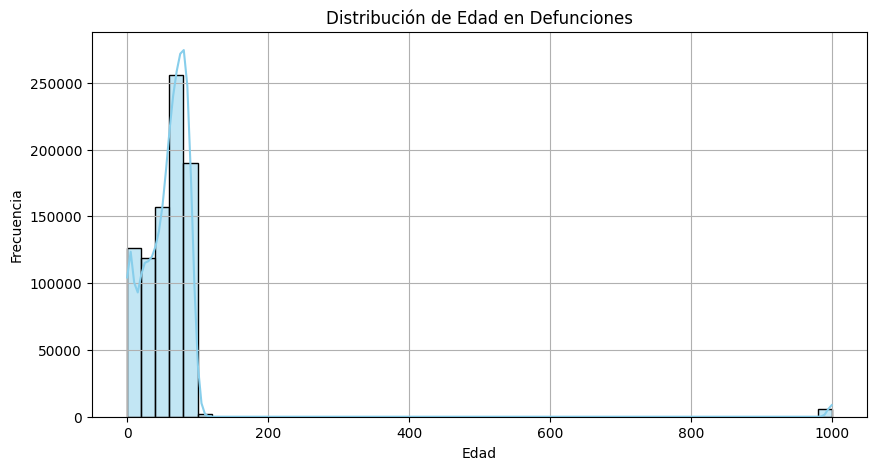

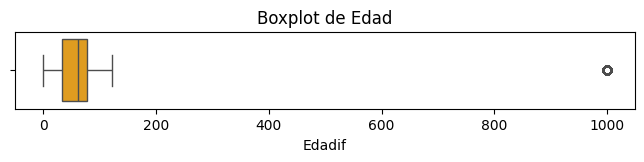


Frecuencia de Sexo:

Sexo
1.0    480556
2.0    374851
Name: count, dtype: int64

Frecuencia de Caudef:

Caudef
I219    61997
J189    46809
E149    33581
R98X    30327
X599    25408
        ...  
Y084        1
J342        1
O340        1
O060        1
N958        1
Name: count, Length: 3118, dtype: int64

Frecuencia de Depocu:

Depocu
1.0     249498
9.0      54541
16.0     50846
5.0      49574
12.0     49537
13.0     47907
14.0     41807
10.0     32196
4.0      30097
8.0      25464
22.0     24668
6.0      23834
17.0     22140
20.0     21297
7.0      20499
18.0     20453
3.0      19527
11.0     17850
21.0     16538
19.0     15500
15.0     12434
2.0       9200
Name: count, dtype: int64

Frecuencia de Escodif:

Escodif
1.0    453598
2.0    233105
4.0     57398
9.0     56472
3.0     40381
5.0     14157
6.0       296
Name: count, dtype: int64

Frecuencia de Puedif:

Puedif
4.0    411148
1.0    217962
9.0    143746
NaN     72657
5.0      9195
3.0       371
2.0       328
Name: count, dtype: i

In [2]:
# Análisis Estadístico de Defunciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("defunciones.csv", low_memory=False)

# Mostrar las columnas disponibles (opcional)
print("Columnas:", df.columns.tolist())

# Asegurarse de que 'Edadif' sea numérica
df["Edadif"] = pd.to_numeric(df["Edadif"], errors='coerce')

# Eliminar edades negativas o nulas (si las hubiera)
df = df[df["Edadif"] >= 0]

# 🔹 Estadísticas básicas
media = df["Edadif"].mean()
mediana = df["Edadif"].median()
moda = df["Edadif"].mode().values[0]
desviacion = df["Edadif"].std()
percentiles = df["Edadif"].quantile([0.25, 0.5, 0.75])

print("Media de edad:", round(media, 2))
print("Mediana:", mediana)
print("Moda:", moda)
print("Desviación estándar:", round(desviacion, 2))
print("Percentiles:")
print(percentiles)

# 🔹 Histograma de edad
plt.figure(figsize=(10,5))
sns.histplot(df["Edadif"], bins=50, kde=True, color='skyblue')
plt.title("Distribución de Edad en Defunciones")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# 🔹 Boxplot para ver outliers
plt.figure(figsize=(8, 1))
sns.boxplot(x=df["Edadif"], color='orange')
plt.title("Boxplot de Edad")
plt.show()

# 🔹 Tablas de frecuencia para variables categóricas
categoricas = ["Sexo", "Caudef", "Depocu", "Escodif", "Puedif"]

for col in categoricas:
    if col in df.columns:
        print(f"\nFrecuencia de {col}:\n")
        print(df[col].value_counts(dropna=False))


El análisis estadístico de las defunciones ocurridas en Guatemala entre 2012 y 2021 revela una distribución que refleja con claridad las condiciones estructurales del sistema de salud y los determinantes sociales de la mortalidad. La media de edad al fallecer es de 61.55 años y la mediana de 62, lo cual sugiere que la mayoría de las defunciones se concentran en personas adultas y adultos mayores, una tendencia común en países donde las enfermedades crónicas no transmisibles son prevalentes. Sin embargo, el dato más preocupante es que la moda corresponde a 1 año de edad, lo que indica una elevada cantidad de muertes en menores de un año, posiblemente asociadas a causas prevenibles como condiciones perinatales, infecciones respiratorias o falta de atención médica oportuna. Este fenómeno evidencia brechas críticas en la cobertura de salud materno-infantil y podría vincularse a factores como pobreza, malnutrición o falta de acceso a servicios básicos. Por otro lado, la desviación estándar elevada y la presencia de edades cercanas a los 1,000 años, detectadas como valores atípicos, sugiere que existen inconsistencias en la calidad del registro, lo cual limita parcialmente la fiabilidad del análisis si no se depuran adecuadamente. Al revisar variables categóricas como el sexo y el departamento, se evidencian disparidades notorias: algunos departamentos presentan una cantidad significativamente mayor de defunciones, lo cual podría reflejar tanto una mayor densidad poblacional como inequidades históricas en el acceso a salud, seguridad o servicios públicos. En conjunto, estos hallazgos no solo permiten caracterizar los datos, sino que ofrecen pistas sólidas para la formulación de una pregunta de investigación centrada en los grupos más vulnerables y en las causas estructurales de la mortalidad en el país.

Causas de muerte más frecuentes (ya decodificadas):

descripcion_cie
Infarto agudo del miocardio, sin otra especificación                                        61997
Neumonía, no especificada                                                                   46809
Diabetes mellitus no especificada, sin mención de complicación                              33581
Muerte sin asistencia                                                                       30327
Exposición a factores no especificados que causan otras lesiones y las no especificadas     25408
Otras causas mal definidas y las no especificadas de mortalidad                             24835
Otras cirrosis del hígado y las no especificadas                                            24636
COVID-19, virus identificado                                                                21759
Senilidad                                                                                   21304
Accidente vascular encefálico agudo, no especific

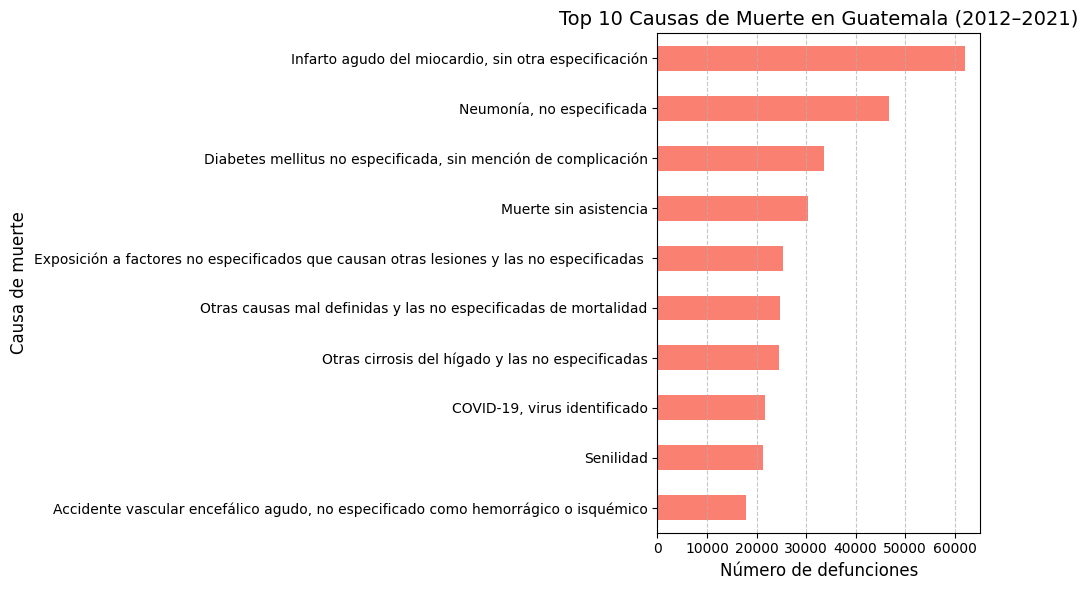

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos
df = pd.read_csv("defunciones.csv", low_memory=False)
cie = pd.read_csv("CIE.csv")

# Asegurar consistencia en los nombres de columnas
cie.columns = [col.lower().strip() for col in cie.columns]
cie.rename(columns={'codigo': 'codigo_cie', 'descripcion': 'descripcion_cie'}, inplace=True)

# Asegurarse de que Caudef y codigo_cie sean strings para que coincidan
df['Caudef'] = df['Caudef'].astype(str).str.strip()
cie['codigo_cie'] = cie['codigo_cie'].astype(str).str.strip()

# Unir los datos por el código
df_merged = df.merge(cie, left_on='Caudef', right_on='codigo_cie', how='left')

# Ver los valores más frecuentes con sus descripciones
frecuencias = df_merged['descripcion_cie'].value_counts().head(10)
print("Causas de muerte más frecuentes (ya decodificadas):\n")
print(frecuencias)

# Crear el gráfico
plt.figure(figsize=(10, 6))
frecuencias.sort_values().plot(kind='barh', color='salmon')

plt.title("Top 10 Causas de Muerte en Guatemala (2012–2021)", fontsize=14)
plt.xlabel("Número de defunciones", fontsize=12)
plt.ylabel("Causa de muerte", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
